In [65]:
from blackboxscan.scanner import GenerativeModelOutputs
from transformers import AutoModelForCausalLM, AutoTokenizer

In [66]:
# model_name = "meta-llama/Llama-2-7b-hf"
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name, padding_side="left")
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

In [67]:
s = GenerativeModelOutputs(model = model, tokenizer=tokenizer)

TypeError: GenerativeModelOutputs.__init__() missing 1 required positional argument: 'inputs'

In [59]:
sentence = ['Hello! I am an']
inputs = tokenizer(sentence, return_tensors="pt")
greedy_short_outputs = model.generate(**inputs, max_new_tokens=1, top_k=4, return_dict_in_generate=True, output_scores=True)
greedy_score = greedy_short_outputs.scores[0]
print(type(greedy_score), greedy_score.shape)
greedy_score.topk(10, dim=1)
greedy_top_tokens = tokenizer.batch_decode(greedy_score.topk(10, dim=1).indices)[0].split()

for token in greedy_top_tokens:
    print(token)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<class 'torch.Tensor'> torch.Size([1, 50257])
English
old
artist
American
avid
expert
engineer
adult
amateur
experienced


In [63]:
greedy_top_tokens

['English',
 'old',
 'artist',
 'American',
 'avid',
 'expert',
 'engineer',
 'adult',
 'amateur',
 'experienced']

In [22]:
greedy_short_outputs = model.generate(**inputs, max_new_tokens=1, top_k=4, return_dict_in_generate=True, output_scores=True)

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:427: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `4` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [25]:
greedy_score = greedy_short_outputs.scores[0]
print(type(greedy_score), greedy_score.shape)

<class 'torch.Tensor'> torch.Size([1, 50257])


In [31]:
greedy_score.topk(5, dim=1)

torch.return_types.topk(
values=tensor([[-89.8760, -89.8863, -89.9011, -89.9275, -90.4178]]),
indices=tensor([[ 3594,  1468,  6802,  1605, 32450]]))

In [60]:
import numpy as np
k = greedy_score.topk(10, dim=1)[0].tolist()[0]
k

[-89.87600708007812,
 -89.88628387451172,
 -89.90108489990234,
 -89.927490234375,
 -90.41777038574219,
 -90.50363159179688,
 -90.73591613769531,
 -90.773681640625,
 -90.79888153076172,
 -90.90409851074219]

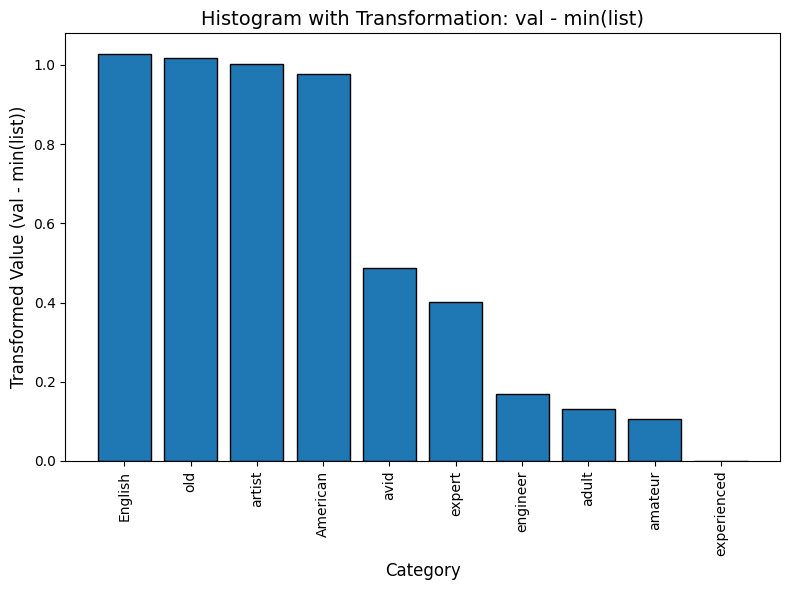

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Original data
data = [-89.87600708007812,
        -89.88628387451172,
        -89.90108489990234,
        -89.927490234375,
        -90.41777038574219,
        -90.50363159179688,
        -90.73591613769531,
        -90.773681640625,
        -90.79888153076172,
        -90.90409851074219]

# Calculate the minimum value in the list
min_value = min(data)

# Apply the transformation: val - min(list)
transformed_data = [x - min_value for x in data]

# Labels for each bar
labels = ['English', 'old', 'artist', 'American', 'avid', 'expert', 'engineer', 'adult', 'amateur', 'experienced']

# Plot the bar chart with transformed values
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, transformed_data, edgecolor='black')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels and title
plt.title('Histogram with Transformation: val - min(list)', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Transformed Value (val - min(list))', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

In [27]:
greedy_top_tokens = tokenizer.batch_decode(greedy_score.topk(5, dim=1).indices)[0].split()

for token in greedy_top_tokens:
    print(token)

English
old
artist
American
avid
